In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from scipy import stats
import datetime

## 1. Importing & Reading

In [45]:
#importing airline data
df = pd.read_csv("airline_performance.csv")
df.head()

,Flight Date,Carrier,Origin Airport,Origin State,Destination Airport,Destination State,Departure Time,Departure Delay,Arrival Time,Arrival Delay,Distance,Dep Delay 15,Arrival Delay 15,Carrier Delay,Weather Delay,NAS Delay,Security Delay,Late Aircraft Delay
0,1-Dec,HA,LAX,California,HNL,Hawaii,6:59,-1,10:45,-15.0,2556,0,0.0,NaN,NaN,NaN,NaN,NaN
1,1-Dec,HA,HNL,Hawaii,LAX,California,15:33,-2,22:53,-7.0,2556,0,0.0,NaN,NaN,NaN,NaN,NaN
2,1-Dec,HA,LAX,California,HNL,Hawaii,10:05,5,13:49,-11.0,2556,0,0.0,NaN,NaN,NaN,NaN,NaN
3,1-Dec,HA,HNL,Hawaii,LAX,California,1:07,142,8:24,144.0,2556,1,1.0,144.0,0.0,0.0,0.0,0.0
4,1-Dec,HA,LAS,Nevada,HNL,Hawaii,17:31,1,21:56,1.0,2762,0,0.0,NaN,NaN,NaN,NaN,NaN


Description of Field Name
- Carrier - Code of Airline
- Departure Delay (minutes) - Difference in minutes between scheduled and actual departure time 
- Arrival Delay (minutes) - Difference in minutes between scheduled and actual arrival time
- Dep Delay 15 - Arrival Delay Indicator, 15 Minutes or More (1=Yes, 0=No)
- Arr Delay 15 - Arrival Delay Indicator, 15 Minutes or More (1=Yes, 0=No)
- Carrier Delay (minutes) - 
- Whether Delay (minutes)
- Nas Delay (minutes)
- Security Delay (minutes)
- Late Aircraft Delay (minutes)

In [46]:
df.shape

(619970, 18)

In [17]:
df.describe()

,Departure Delay,Arrival Delay,Distance,Dep Delay 15,Arrival Delay 15,Carrier Delay,Weather Delay,NAS Delay,Security Delay,Late Aircraft Delay
count,619970.000000,618612.000000,619970.000000,619970.000000,618612.000000,126945.000000,126945.000000,126945.000000,126945.000000,126945.000000
mean,12.331011,6.119191,812.571178,0.206471,0.205209,21.149427,3.067029,15.141581,0.087290,28.177817
std,50.979922,53.292792,593.985021,0.404773,0.403855,68.206656,32.129444,35.088202,2.225987,55.918673
min,-49.000000,-93.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.000000,-15.000000,373.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.000000,-6.000000,651.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,6.000000
75%,9.000000,9.000000,1050.000000,0.000000,0.000000,18.000000,0.000000,19.000000,0.000000,34.000000
max,2710.000000,2695.000000,5095.000000,1.000000,1.000000,2695.000000,1847.000000,1237.000000,366.000000,1627.000000


In [35]:
#Looking at column headings
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617440 entries, 0 to 619969
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Flight Date          617440 non-null  object 
 1   Carrier              617440 non-null  object 
 2   Origin Airport       617440 non-null  object 
 3   Origin State         617440 non-null  object 
 4   Destination Airport  617440 non-null  object 
 5   Destination State    617440 non-null  object 
 6   Departure Time       617440 non-null  object 
 7   Departure Delay      617440 non-null  int64  
 8   Arrival Time         617440 non-null  object 
 9   Arrival Delay        617440 non-null  float64
 10  Distance             617440 non-null  int64  
 11  Dep Delay 15         617440 non-null  int64  
 12  Arrival Delay 15     617440 non-null  float64
 13  Carrier Delay        126720 non-null  float64
 14  Weather Delay        126720 non-null  float64
 15  NAS Delay        

## 2. Cleaning

In [54]:
#Finding how many null values in each column
df.isnull().sum()
df


,Flight Date,Carrier,Origin Airport,Origin State,Destination Airport,Destination State,Departure Time,Departure Delay,Arrival Time,Arrival Delay,Distance,Dep Delay 15,Arrival Delay 15,Carrier Delay,Weather Delay,NAS Delay,Security Delay,Late Aircraft Delay
0,1-Dec,HA,LAX,California,HNL,Hawaii,6:59,-1,10:45,-15.0,2556,0,0.0,NaN,NaN,NaN,NaN,NaN
1,1-Dec,HA,HNL,Hawaii,LAX,California,15:33,-2,22:53,-7.0,2556,0,0.0,NaN,NaN,NaN,NaN,NaN
2,1-Dec,HA,LAX,California,HNL,Hawaii,10:05,5,13:49,-11.0,2556,0,0.0,NaN,NaN,NaN,NaN,NaN
3,1-Dec,HA,HNL,Hawaii,LAX,California,1:07,142,8:24,144.0,2556,1,1.0,144.0,0.0,0.0,0.0,0.0
4,1-Dec,HA,LAS,Nevada,HNL,Hawaii,17:31,1,21:56,1.0,2762,0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619965,31-Dec,B6,MCO,Florida,SWF,New York,15:00,64,17:31,52.0,989,1,1.0,52.0,0.0,0.0,0.0,0.0
619966,31-Dec,B6,DCA,Virginia,BOS,Massachusetts,14:14,-6,15:33,-17.0,399,0,0.0,NaN,NaN,NaN,NaN,NaN
619967,31-Dec,B6,PHL,Pennsylvania,BOS,Massachusetts,6:52,-8,7:51,-34.0,280,0,0.0,NaN,NaN,NaN,NaN,NaN
619968,31-Dec,B6,BOS,Massachusetts,SJU,Puerto Rico,8:12,-1,12:48,-27.0,1674,0,0.0,NaN,NaN,NaN,NaN,NaN


In [36]:
#Replacing all null values with 0
df['Carrier Delay'].replace(np.nan, 0, inplace= True)
df['Weather Delay'].replace(np.nan, 0, inplace= True)
df['NAS Delay'].replace(np.nan, 0, inplace= True)
df['Security Delay'].replace(np.nan, 0, inplace= True)
df['Late Aircraft Delay'].replace(np.nan, 0, inplace= True)
df = df.dropna()
df.isnull().sum()
df[df['Carrier ']]

Flight Date            0
Carrier                0
Origin Airport         0
Origin State           0
Destination Airport    0
Destination State      0
Departure Time         0
Departure Delay        0
Arrival Time           0
Arrival Delay          0
Distance               0
Dep Delay 15           0
Arrival Delay 15       0
Carrier Delay          0
Weather Delay          0
NAS Delay              0
Security Delay         0
Late Aircraft Delay    0
dtype: int64

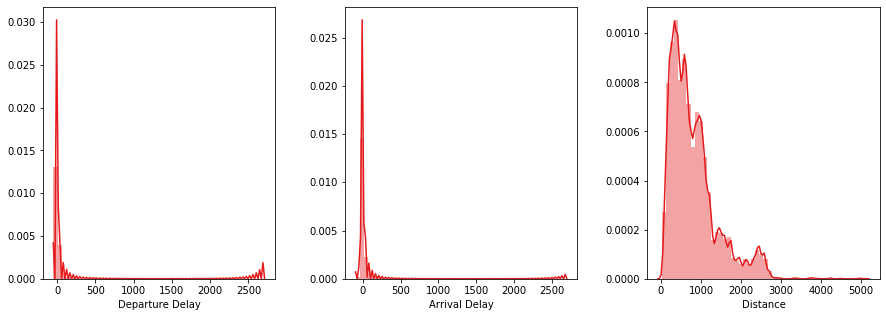

In [21]:
#Plotting histograms to show frequency in delays based on different variables
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace=0.3)
sns.set_palette("Set1")

#Plotting frequency distribution of length of time of departure delay
sub1 = fig.add_subplot(1,3,1)
sub1 = sns.distplot(df['Departure Delay'], hist = True)

#Plotting frquency distribution of length of time of arrival delays
sub2 = fig.add_subplot(1,3,2)
sub2 = sns.distplot(df['Arrival Delay'], hist = True)

#Plotting frequency distribution of distance
sub3 = fig.add_subplot(1,3,3)
sub3 = sns.distplot(df['Distance'], hist = True)

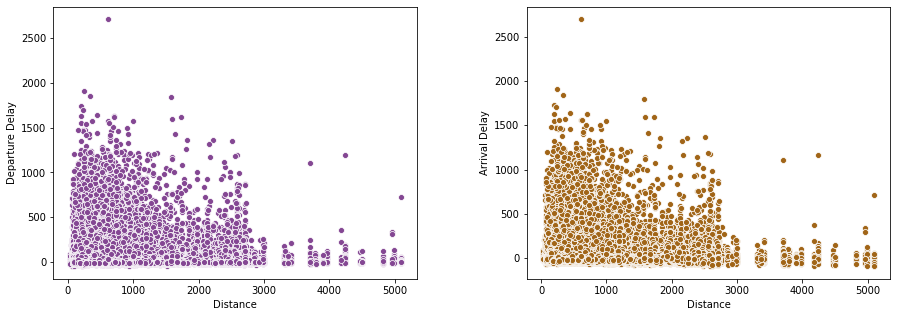

In [22]:
#Scatter plots to see how much distance affects arrival and departure delays
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace=0.3)

#Plotting scatter plot of distance vs. departure delay
sub1 = sns.set_palette("PRGn")
sub1 = fig.add_subplot(1,2,1)
sub1 = sns.scatterplot(x="Distance", y="Departure Delay", data=df)

#Plotting scatter plot of distance vs. arrival delay
sub2 = sns.set_palette("BrBG")
sub2 = fig.add_subplot(1,2,2)
sub2 = sns.scatterplot(x="Distance", y="Arrival Delay", data=df)

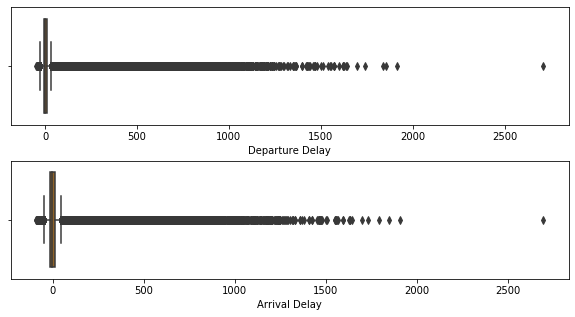

In [23]:
#Plotting box plots 
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.3)

#Plotting how long delays were for departure and arrival
sub1 = fig.add_subplot(2,1,1)
sub1 = sns.boxplot(df['Departure Delay'], data=df)
sub2 = sns.set_palette("BrBG")
sub1 = fig.add_subplot(2,1,2)
sub2 = sns.boxplot(df['Arrival Delay'], data=df)

In [33]:
# Remove outliers affecting to the model
df = df[df['Distance'] <= 3000]
df = df[df['Departure Delay'] <= 1500]
df = df[df['Arrival Delay'] <= 1500]
df.shape

(617440, 18)

## 3. Exploratary Analysis & Visulization

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 8 Text yticklabel objects>)

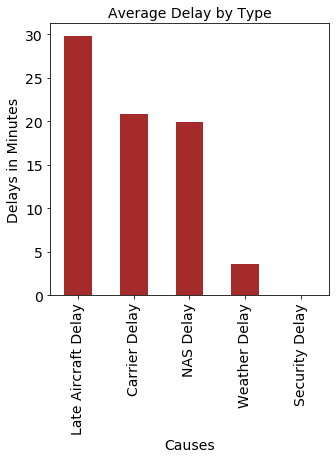

In [0]:
#Bar chart of Causes in delays and how long delays were affected
fig = plt.figure(figsize = (5, 5))
df[['Carrier Delay', 'Weather Delay','NAS Delay', 'Security Delay', 'Late Aircraft Delay']].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'brown')
plt.title('Average Delay by Type', fontsize = 14)
plt.xlabel('Causes', fontsize = 14)
plt.ylabel('Delays in Minutes', fontsize = 14)
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)

(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 <a list of 6 Text yticklabel objects>)

<Figure size 720x504 with 0 Axes>

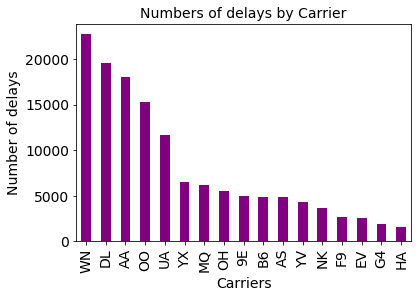

In [0]:
#Bar chart of which airline carriers experienced the most delays
fig = plt.figure(figsize = (10, 7))
df[['Carrier', 'Dep Delay 15']].groupby('Carrier').count().sort_values(by = 'Dep Delay 15', ascending = False).plot(kind = 'bar', color = 'purple', legend = False)
plt.title('Numbers of delays by Carrier', fontsize = 14)
plt.xlabel('Carriers', fontsize = 14)
plt.ylabel('Number of delays', fontsize = 14)
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)

(array([ 0., 10., 20., 30., 40., 50.]), <a list of 6 Text yticklabel objects>)

<Figure size 1440x720 with 0 Axes>

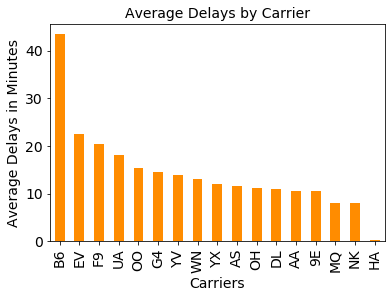

In [0]:
#Bar chart of which airline carriers experienced the longest average delay
fig = plt.figure(figsize = (20, 10))
df[['Carrier', 'Departure Delay']].groupby('Carrier').mean().sort_values(by = 'Departure Delay', ascending = False).plot(kind = 'bar', color = 'darkorange', legend = False)
plt.title('Average Delays by Carrier', fontsize = 14)
plt.xlabel('Carriers', fontsize = 14)
plt.ylabel('Average Delays in Minutes', fontsize = 14)
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)

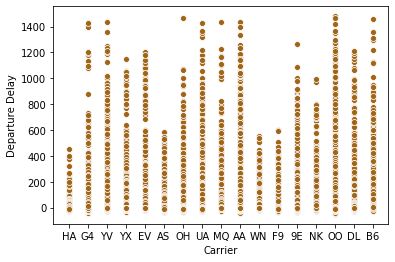

In [0]:
#Scatter plot showing airline carriers with the amount of departure delays in terms of length of time
sns.scatterplot(x="Carrier", y="Departure Delay", data=df)

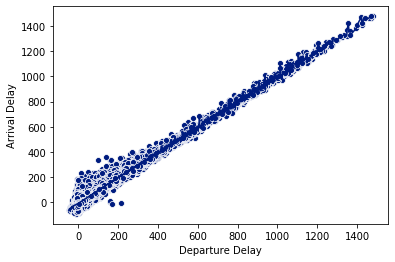

In [0]:
#Scatter plot of correlation between departure and arrival delays
sns.set_palette("dark")
sns.scatterplot(x="Departure Delay", y="Arrival Delay", data=df)

#Predictive line of the correlation between departure and arrival delays
sns.lineplot(x="Departure Delay", y="Arrival Delay", data=df)

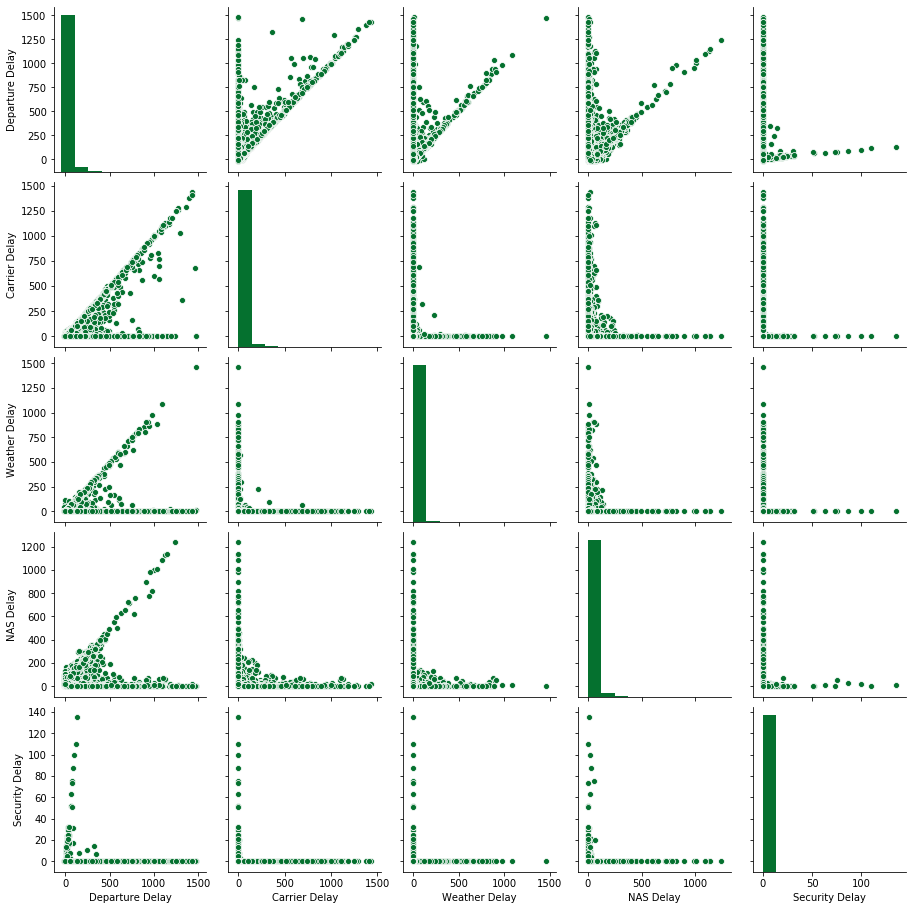

In [0]:
#Scatter plots between the 5 variables that caused delays
sns.set_palette("BuGn_r")
sns.pairplot(df[['Departure Delay','Carrier Delay', 'Weather Delay','NAS Delay', 'Security Delay']], kind="scatter")
plt.show()

In [0]:
pd.crosstab(df['Dep Delay 15'], df['Arrival Delay 15'])

Arrival Delay 15,0.0,1.0
Dep Delay 15,,
0.0,101975,5880
1.0,5706,23344


In [13]:
# Convert the non-numeric data into numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df:
    if df[col].dtypes == 'object':
        df[col]=le.fit_transform(list(df[col]))
        
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617440 entries, 0 to 619969
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Flight Date          617440 non-null  int64  
 1   Carrier              617440 non-null  int64  
 2   Origin Airport       617440 non-null  int64  
 3   Origin State         617440 non-null  int64  
 4   Destination Airport  617440 non-null  int64  
 5   Destination State    617440 non-null  int64  
 6   Departure Time       617440 non-null  int64  
 7   Departure Delay      617440 non-null  int64  
 8   Arrival Time         617440 non-null  int64  
 9   Arrival Delay        617440 non-null  float64
 10  Distance             617440 non-null  int64  
 11  Dep Delay 15         617440 non-null  int64  
 12  Arrival Delay 15     617440 non-null  float64
 13  Carrier Delay        617440 non-null  float64
 14  Weather Delay        617440 non-null  float64
 15  NAS Delay        

0         8
1         8
2         8
3         8
4         8
         ..
619965    3
619966    3
619967    3
619968    3
619969    3
Name: Carrier, Length: 617440, dtype: int64

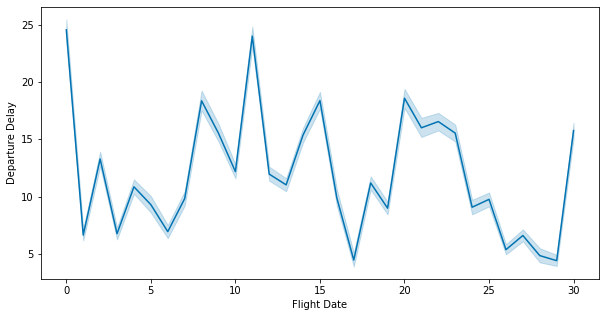

In [0]:
#line plot of amount of departure delays based on 1-30 days in each month
fig = plt.figure(figsize = (10, 5))
sns.set_palette("colorblind")
sns.lineplot(x="Flight Date", y="Departure Delay", data=df)

In [0]:
#Correlation chart between all variables in the data
corrmat = df.corr()
corrmat

,Flight Date,Carrier,Origin Airport,Origin State,Destination Airport,Destination State,Departure Time,Departure Delay,Arrival Time,Arrival Delay,Distance,Dep Delay 15,Arrival Delay 15,Carrier Delay,Weather Delay,NAS Delay,Security Delay,Late Aircraft Delay
Flight Date,1.000000,-0.009262,0.002048,0.005768,0.003042,0.005836,-0.002430,-0.143296,-0.007061,-0.171701,-0.001957,-0.179026,-0.197201,0.011472,-0.033862,-0.078874,0.006630,-0.072613
Carrier,-0.009262,1.000000,0.039414,-0.000576,0.040184,-0.000538,0.000680,0.000603,0.002362,-0.004242,-0.157376,0.024710,0.004340,-0.021173,0.005577,-0.065476,-0.006635,0.008276
Origin Airport,0.002048,0.039414,1.000000,-0.089383,0.015706,-0.041725,-0.001884,0.013834,0.008586,0.012853,0.100669,0.019131,0.019216,-0.005452,-0.018652,0.010615,-0.001324,0.025855
Origin State,0.005768,-0.000576,-0.089383,1.000000,-0.042257,0.014743,0.005747,-0.005469,0.003585,-0.002144,-0.073149,-0.022620,-0.006958,0.009100,0.018008,0.004955,-0.000441,0.000970
Destination Airport,0.003042,0.040184,0.015706,-0.042257,1.000000,-0.090014,-0.001744,0.017263,-0.020155,0.024762,0.101343,0.031535,0.036690,-0.004208,-0.014570,0.008240,-0.009979,-0.012270
Destination State,0.005836,-0.000538,-0.041725,0.014743,-0.090014,1.000000,-0.013234,-0.005610,-0.010958,-0.013353,-0.073080,-0.008807,-0.021059,0.006720,0.021061,-0.032308,-0.012629,0.034756
Departure Time,-0.002430,0.000680,-0.001884,0.005747,-0.001744,-0.013234,1.000000,-0.050887,0.358497,-0.048810,0.029258,-0.099092,-0.074120,0.028348,0.025745,-0.013920,0.006034,-0.025088
Departure Delay,-0.143296,0.000603,0.013834,-0.005469,0.017263,-0.005610,-0.050887,1.000000,-0.012752,0.967212,0.042324,0.573323,0.534869,0.629082,0.312165,0.238363,-0.001608,0.530171
Arrival Time,-0.007061,0.002362,0.008586,0.003585,-0.020155,-0.010958,0.358497,-0.012752,1.000000,-0.013599,-0.012609,-0.038144,-0.034327,-0.010234,-0.000089,0.025254,0.015445,0.048638
Arrival Delay,-0.171701,-0.004242,0.012853,-0.002144,0.024762,-0.013353,-0.048810,0.967212,-0.013599,1.000000,0.032528,0.561610,0.601336,0.617941,0.321887,0.329375,-0.001787,0.505731


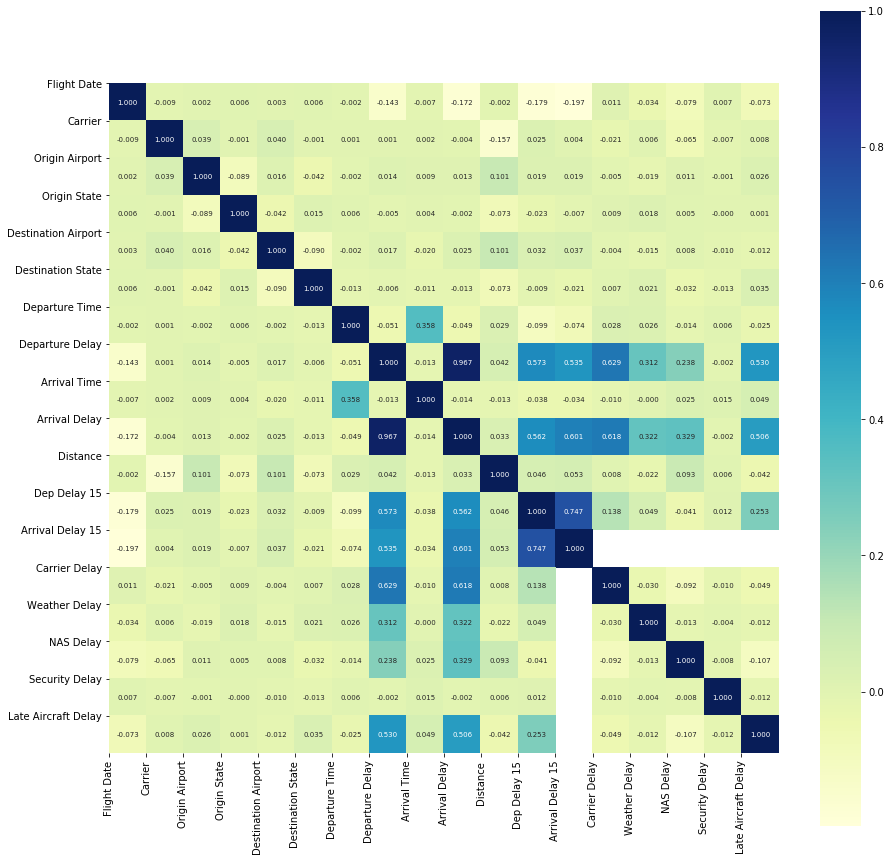

In [0]:
#Heatmap showing all correlation in the data, showing which variables have the most correlation
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, cmap='YlGnBu', annot=True, fmt=".3f", square= True, annot_kws={'size':7})
plt.xticks(range(len(corrmat.columns)), corrmat.columns)
plt.yticks(range(len(corrmat.columns)), corrmat.columns)
plt.show()

### 4. Predictive Models


##### Split and Train Data

In [0]:
data = df.drop(['Origin Airport', 'Destination Airport', 'Arrival Time', 'Arrival Delay', 'Arrival Delay 15'], axis=1)

In [0]:
# Segregate features and labels into separate variables
X = data.drop(['Dep Delay 15'], axis=1)
y = data['Dep Delay 15']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Preprocessing


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [0]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [0]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(solver='lbfgs', max_iter = 500)
logr.fit(rescaledX_train, y_train)
y_pred_logr = logr.predict(rescaledX_test)

r2_logr = r2_score(y_test, y_pred_logr)
mae_logr = mean_absolute_error(y_test, y_pred_logr)
mse_logr = mean_squared_error(y_test, y_pred_logr)
rmse_logr = np.sqrt(mean_squared_error(y_test, y_pred_logr))
cv_logr = cross_val_score(logr, rescaledX_test, y_test, cv = 10)
cm_logr = confusion_matrix(y_test, y_pred_logr)
acc_logr = accuracy_score(y_test, y_pred_logr)
cr_logr = classification_report(y_test, y_pred_logr)
pc_logr = precision_score(y_test, y_pred_logr)
rc_logr = recall_score(y_test, y_pred_logr)
f1_logr = f1_score(y_test, y_pred_logr)

print("Accuracy score:", acc_logr)
print('CV Score:', cv_logr.mean())
print("R^2:", r2_logr)
print('MSE:',mse_logr)
print('RMSE:', rmse_logr)
print("Confusion matrix:\n", cm_logr)
print("Classification report:\n", cr_logr)

ValueError: ignored

In [0]:
import statsmodels.api as sm
model = sm.Logit(y_train, rescaledX_train)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.203338
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Dep Delay 15   No. Observations:               493952
Model:                          Logit   Df Residuals:                   493940
Method:                           MLE   Df Model:                           11
Date:                Sun, 08 Mar 2020   Pseudo R-squ.:                  0.6010
Time:                        02:14:04   Log-Likelihood:            -1.0044e+05
converged:                       True   LL-Null:                   -2.5172e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.0749      0.020   -101.302      0.000      -2.115      -2.035
x2            -1.8418      0.018   -100.886      0.000      -1.878      -1.806
x3            -2.1128      0.021    -98.539      0.000      -2.155      -2.071
x4            -2.0201      0.021    -95.232      0.000      -2.062      -1.978
x5            -2.7639      0.023   -120.984      0.000      -2.809      -2.719
x6            78.9857      0.592    133.519      0.000      77.826      80.145
x7            -2.6351      0.034    -78.413      0.000      -2.701      -2.569
x8           325.6873      2.502    130.187      0.000     320.784     330.591
x9           262.8501      7.045     37.311      0.000     249.042     276.658
x10           19.4103      0.623     31.170      0.000      18.190      20.631
x11           42.0720      2.552     16.484      0.000      37.069      47.075
x12          328.6858      2.917    112.693      0.000     322.969     334.402
==============================================================================
"""

In [0]:
# KNeighborClassifer
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(rescaledX_train, y_train)
y_pred_knn = knn.predict(rescaledX_test)

r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
cv_knn = cross_val_score(knn, X_test, y_test, cv = 10)
cm_knn = confusion_matrix(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
cr_knn = classification_report(y_test, y_pred_knn)
pc_knn = precision_score(y_test, y_pred_knn)
rc_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("Accuracy score:", acc_knn)
print('CV Score:', cv_knn.mean())
print("R^2:", r2_knn)
print('MSE:',mse_knn)
print('RMSE:', rmse_knn)
print("Confusion matrix:\n", cm_knn)
print("Classification report:\n", cr_knn)

Accurancy score: 0.8500016195905675
CV Score: 0.9522544806438322
R^2: 0.07672187586500467
MSE: 0.1499983804094325
RMSE: 0.38729624373266586
Confusion matrix:
 [[95490  2790]
 [15733  9475]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     98280
           1       0.77      0.38      0.51     25208

    accuracy                           0.85    123488
   macro avg       0.82      0.67      0.71    123488
weighted avg       0.84      0.85      0.83    123488



In [0]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(rescaledX_train, y_train.ravel())
y_pred_dt = dt.predict(rescaledX_test)

r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
cv_dt = cross_val_score(dt, X_test, y_test, cv = 10)
cm_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
cr_dt = classification_report(y_test, y_pred_dt)
pc_dt = precision_score(y_test, y_pred_dt)
rc_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Accuracy score:", acc_dt)
print('CV Score:', cv_dt.mean())
print("R^2:", r2_dt)
print('MSE:',mse_dt)
print('RMSE:', rmse_dt)
print("Confusion matrix:\n", cm_dt)
print("Classification report:\n", cr_dt)

Accurancy score: 0.9366659108577352
CV Score: 1.0
R^2: 0.6101625973730066
MSE: 0.06333408914226483
RMSE: 0.2516626494779566
Confusion matrix:
 [[98280     0]
 [ 7821 17387]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     98280
           1       1.00      0.69      0.82     25208

    accuracy                           0.94    123488
   macro avg       0.96      0.84      0.89    123488
weighted avg       0.94      0.94      0.93    123488



In [0]:
models = [('Logistic Regression', acc_logr, pc_logr, rc_logr, f1_logr, cv_logr.mean(), r2_logr, rmse_logr),
          ('K-Nearest Neighbors Classifier', acc_knn, pc_knn, rc_knn, f1_knn, cv_knn.mean(), r2_knn, rmse_knn),
          ('Decision Tree Regression', acc_dt, pc_dt, rc_dt, f1_dt, cv_dt.mean(), r2_dt, rmse_dt),
         ]

In [0]:
predict = pd.DataFrame(data = models, columns=['Model', 'Accuracy Score', 'Precision', 'Recall', 'F1 Score', 
                                               'Cross-Validation','R-squared', 'RMSE'])
predict

,Model,Accuracy Score,Precision,Recall,F1 Score,Cross-Validation,R-squared,RMSE
0,Logistic Regression,0.924527,1.000000,0.630276,0.773214,0.932787,0.535445,0.274723
1,K-Nearest Neighbors Classifier,0.850002,0.772523,0.375873,0.505697,0.952254,0.076722,0.387296
2,Decision Tree Regression,0.936666,1.000000,0.689741,0.816387,1.000000,0.610163,0.251663


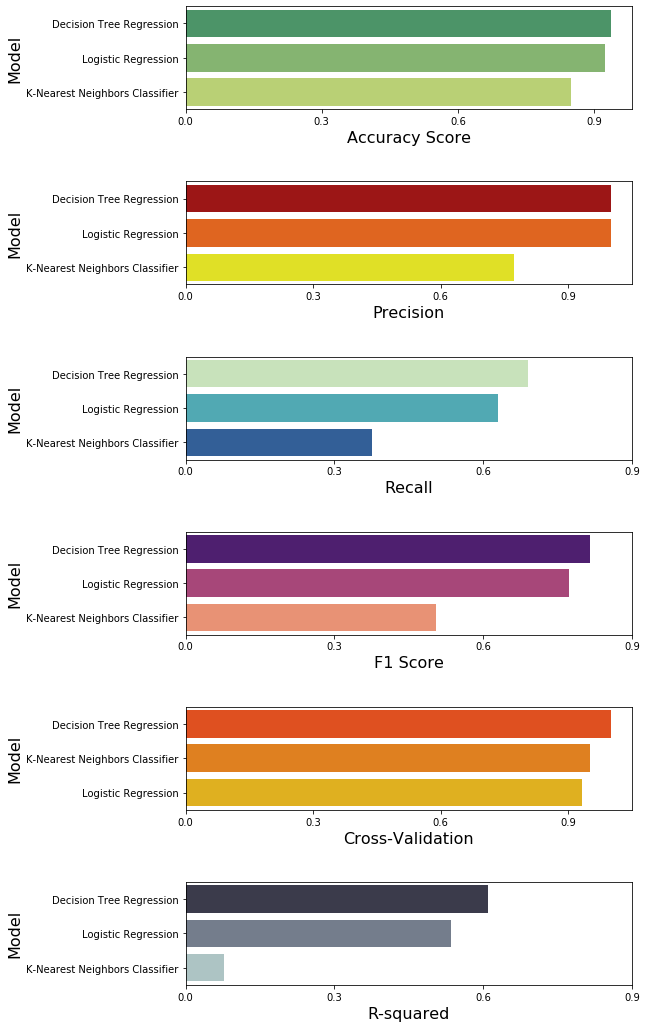

In [0]:
fig = plt.figure(figsize=(8, 18))

sub1 = fig.add_subplot(6,1,1)
predict.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)
sub1 = sns.barplot(x='Accuracy Score', y = 'Model', data = predict, palette='summer')
sub1.set_xlabel('Accuracy Score', size=16)
sub1.set_ylabel('Model', size=16)
sub1.set_xticks(np.arange(0, 1.1, 0.3))

fig.subplots_adjust(hspace=0.7, wspace=0.7)
sub2 = fig.add_subplot(6,1,2)
predict.sort_values(by=['Precision'], ascending=False, inplace=True)
sub2 = sns.barplot(x='Precision', y='Model', data = predict, palette='hot')
sub2.set_xlabel('Precision', size=16)
sub2.set_ylabel('Model', size=16)
sub2.set_xticks(np.arange(0, 1.1, 0.3))

sub3 = fig.add_subplot(6,1,3)
predict.sort_values(by=['Recall'], ascending=False, inplace=True)
sns.barplot(x='Recall', y='Model', data = predict, palette='YlGnBu')
plt.xlabel('Recall', size=16)
plt.ylabel('Model', size=16)
plt.xticks(np.arange(0, 1.1, 0.3))

sub4 = fig.add_subplot(6,1,4)
predict.sort_values(by=['F1 Score'], ascending=False, inplace=True)
sub4 = sns.barplot(x='F1 Score', y='Model', data = predict, palette='magma')
sub4.set_xlabel('F1 Score', size=16)
sub4.set_ylabel('Model', size=16)
sub4.set_xticks(np.arange(0, 1.1, 0.3))

sub5 = fig.add_subplot(6,1,5)
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)
sub5 = sns.barplot(x='Cross-Validation', y='Model', data = predict, palette='autumn')
sub5.set_xlabel('Cross-Validation', size=16)
sub5.set_ylabel('Model', size=16)
sub5.set_xticks(np.arange(0, 1.1, 0.3))

sub6 = fig.add_subplot(6,1,6)
predict.sort_values(by=['R-squared'], ascending=False, inplace=True)
sub6 = sns.barplot(x='R-squared', y='Model', data = predict, palette='bone')
sub6.set_xlabel('R-squared', size=16)
sub6.set_ylabel('Model', size=16)
sub6.set_xticks(np.arange(0, 1.1, 0.3))

In [0]:
res = pd.DataFrame(data = np.transpose([y_test, y_pred_logr]), columns =  ['Historical Delay', 'Predicted Deplay'])
res.head()

,Historical Delay,Predicted Deplay
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
